In [9]:
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

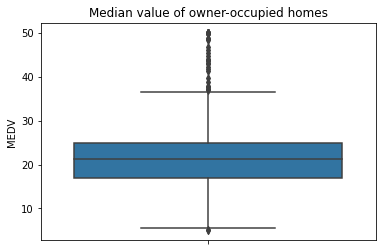

In [2]:
boxplot_medv = sns.boxplot(y="MEDV", data=boston_df)
boxplot_medv.set( title = "Median value of owner-occupied homes" )

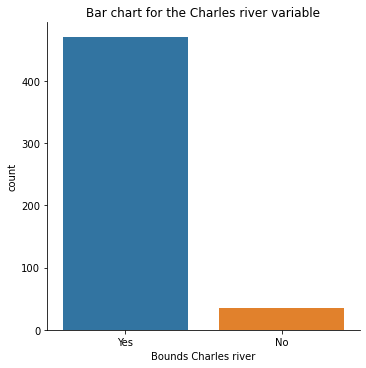

In [3]:
boston_df.loc[(boston_df.CHAS == 0), 'Bounding River'] = 'Yes'
boston_df.loc[(boston_df.CHAS > 0), 'Bounding River'] = 'No'
barplot = sns.catplot(x='Bounding River', kind='count', data=boston_df)
barplot.set (title = "Bar chart for the Charles river variable", xlabel = "Bounds Charles river")

[Text(0.5, 1.0, 'Median value vs Age'), Text(0, 0.5, 'Median Value')]

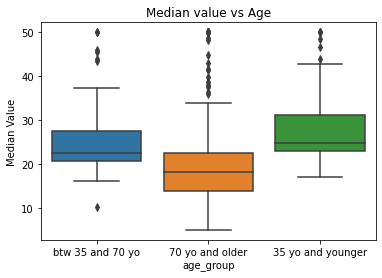

In [4]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 yo and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'btw 35 and 70 yo'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 yo and older'

boxplot2 = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
boxplot2.set(title = "Median value vs Age", ylabel = "Median Value")

[Text(0.5, 0, 'Concentration of Nitric Oxide (parts per 10 million)'),
 Text(0, 0.5, 'Proportion of Non-retail Business Acres'),
 Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business')]

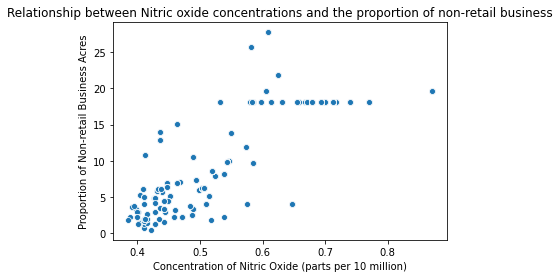

In [5]:
scatterplot = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
scatterplot.set(xlabel = "Concentration of Nitric Oxide (parts per 10 million)", ylabel = "Proportion of Non-retail Business Acres", 
                title = "Relationship between Nitric oxide concentrations and the proportion of non-retail business")

There is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

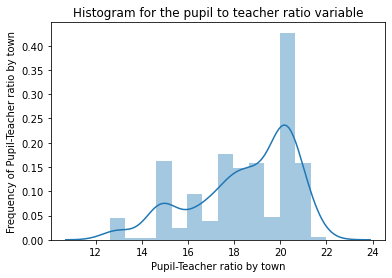

In [7]:
histogram = sns.distplot(boston_df['PTRATIO'])
histogram.set(xlabel = "Pupil-Teacher ratio by town", ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*   $H\_0: µ1 = µ2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ1 ≠ µ2$ ("there is a difference in median value of houses bounded by the Charles rivers")

In [13]:
scipy.stats.levene(boston_df['MEDV'],boston_df['CHAS'], center='mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

* Since the p-value is less than the alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*   $H\_0: µ1 = µ2 = µ3$ ("there is no difference in means")
*   $H\_1$:  ("there is a difference in at least one mean ")

In [14]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

In [15]:
scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439688, pvalue=0.14675700390882251)

In [17]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [18]:
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

* Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   H\_0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
*   H\_1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [20]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209149, 7.913361061240043e-98)

* Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   $H\_0: β1 = 0$  There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
*   $H\_1: β1 ≠ 0$ There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [24]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.21e-08
Time:                        10:30:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*  The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient 1.0916 means that an additional weighted distance to the five Boston employment centres increases the median value of owner occupied homes by 1.0916.